In [15]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [16]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [17]:
# Shape
market_data_df.shape

(41, 7)

In [18]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [19]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

In [20]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data
scaled_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)
print(scaled_df.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

### Find the Best Value for k Using the Original Scaled DataFrame.

In [21]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)


    k_values  inertia_values
0          1      287.000000
1          2      212.123342
2          3      170.193571
3          4       79.022435
4          5       71.097914
5          6       66.108827
6          7       54.488123
7          8       43.224693
8          9       32.860884
9         10       28.404885
10        11       24.116198


C:\Users\AledoHouse\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AledoHouse\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AledoHouse\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AledoHouse\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

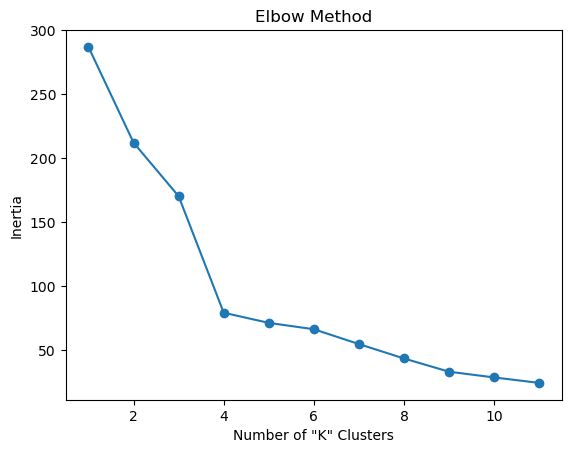

In [23]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of "K" Clusters')
plt.ylabel('Inertia')
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** ** 4 is the best value for 'k' based on this graphic. **

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [24]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=3, random_state=42)

In [25]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)

C:\Users\AledoHouse\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_data_df['cluster'] = kmeans.predict(scaled_df)

# View the resulting array of cluster values.
print(market_data_df['cluster'])

coin_id
bitcoin                 0
ethereum                0
tether                  2
ripple                  2
bitcoin-cash            0
binancecoin             0
chainlink               0
cardano                 0
litecoin                0
bitcoin-cash-sv         2
crypto-com-chain        2
usd-coin                2
eos                     2
monero                  0
tron                    2
tezos                   0
okb                     2
stellar                 2
cosmos                  0
cdai                    2
neo                     2
wrapped-bitcoin         0
leo-token               2
huobi-token             2
nem                     2
binance-usd             2
iota                    2
vechain                 2
zcash                   0
theta-token             2
dash                    2
ethereum-classic        2
ethlend                 0
maker                   0
havven                  2
omisego                 2
celsius-degree-token    1
ontology                2
ftx-

In [30]:
# Create a copy of the DataFrame
crypto_data_clustered = market_data_df.copy()

In [31]:
# Add a new column to the DataFrame with the predicted clusters
crypto_data_clustered['predicted_cluster'] = kmeans.predict(scaled_df)

# Display sample data
print(crypto_data_clustered.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

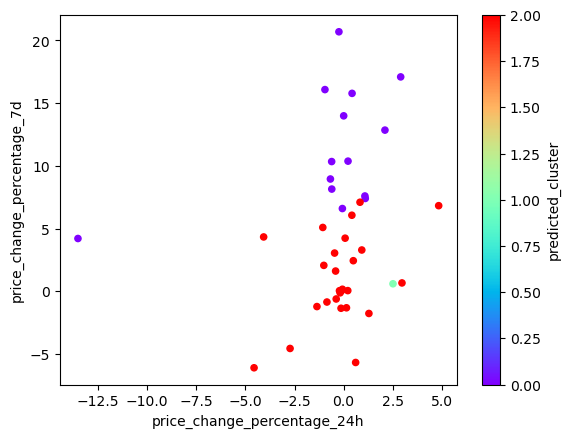

In [32]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
crypto_data_clustered.plot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', c='predicted_cluster', colormap='rainbow')

plt.show()


### Optimize Clusters with Principal Component Analysis.

In [33]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [56]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(market_data_df)
pca_df = pd.DataFrame(data=pca_transformed, columns=['PC1', 'PC2', 'PC3'], index=market_data_df.index)

# View the first five rows of the DataFrame. 
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [60]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
print(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_))


[9.76036827e-01 2.30282836e-02 7.48308193e-04] 0.9998134185525093


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 99.98%

In [61]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df=pd.DataFrame(pca_data,columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
pca_df['coin_id']=market_data_df.index

# Set the coinid column as index
pca_df.set_index("coin_id",inplace=True)

# Display sample data
pca_df

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-341.800762,-51.367012,12.526459
ethereum,-249.420267,24.117312,-14.230480
tether,-402.614824,-118.710622,24.837900
ripple,-406.752540,-79.487172,1.565883
bitcoin-cash,-382.429747,-103.432197,16.754158
binancecoin,-289.124820,12.286934,34.164745
chainlink,28.151604,154.987766,-73.125459
cardano,-174.519633,80.243259,-30.391774
litecoin,-406.613140,-91.783267,5.017138


### Find the Best Value for k Using the PCA Data

In [62]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k:
    
# 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    
# 2. Fit the model to the data using PCA DataFrame.
    k_model.fit(pca_df)

# 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow


C:\Users\AledoHouse\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AledoHouse\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AledoHouse\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AledoHouse\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

,k,inertia
0,1,6.997052e+07
1,2,8.180192e+06
2,3,2.580721e+06
3,4,8.237469e+05
4,5,4.559212e+05
5,6,3.337924e+05
6,7,1.897978e+05
7,8,1.472964e+05
8,9,1.086861e+05
9,10,9.108383e+04


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

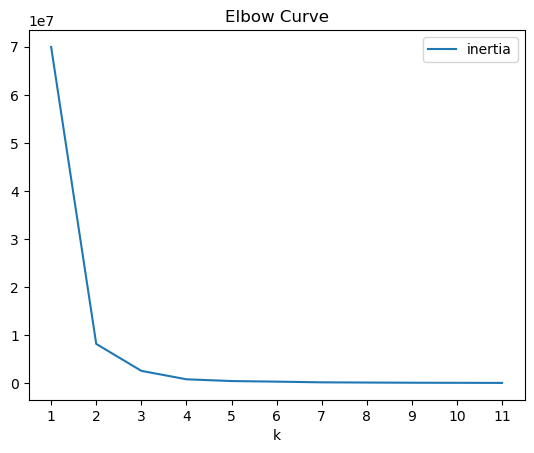

In [63]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  2


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes. Orginal is 4.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [64]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [66]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)


C:\Users\AledoHouse\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [71]:
# Predict the clusters to group the cryptocurrencies using the PCA data
p_4 = model.predict(pca_df)

# Print the resulting array of cluster values.
p_4


array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 3, 0, 0, 0, 2])

In [73]:
# Create a copy of the DataFrame with the PCA data
pca_data_predict = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_data_predict['clusters'] = p_4

# Display sample data
pca_data_predict


,PCA1,PCA2,PCA3,clusters
coin_id,,,,
bitcoin,-341.800762,-51.367012,12.526459,0
ethereum,-249.420267,24.117312,-14.230480,0
tether,-402.614824,-118.710622,24.837900,0
ripple,-406.752540,-79.487172,1.565883,0
bitcoin-cash,-382.429747,-103.432197,16.754158,0
binancecoin,-289.124820,12.286934,34.164745,0
chainlink,28.151604,154.987766,-73.125459,2
cardano,-174.519633,80.243259,-30.391774,0
litecoin,-406.613140,-91.783267,5.017138,0


In [77]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas

pca_data_predict.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="clusters",
    colormap="rainbow")


:Scatter   [PCA1]   (PCA2,clusters)

### Determine the Weights of Each Feature on each Principal Component

In [79]:
# Use the columns from the original scaled DataFrame as the index.
weights_df=pd.DataFrame(pca.components_.T,columns=['PCA1', 'PCA2', 'PCA3'],
                       index=market_data_df.columns)
weights_df

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.001521,0.003933,0.013938
price_change_percentage_7d,-0.000197,-0.001289,-0.016459
price_change_percentage_14d,-0.000705,0.006577,0.126847
price_change_percentage_30d,0.000955,0.087961,0.377662
price_change_percentage_60d,0.008795,0.158367,0.899179
price_change_percentage_200d,0.300266,0.937599,-0.173684
price_change_percentage_1y,0.953813,-0.296700,0.046120
cluster,-0.000152,0.000176,-0.000703


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** Based on the data, price_change_percentage_1y	has the strongest positive influence on PCA1. price_change_percentage_200d has the strongest positive influence on PCA2. price_change_percentage_60d	has the strongest positive influence on PCA3.	
    